In [13]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
#it is the beta distrubution
#Datas I collect:(x_j,n_j)=(successes,trials)
#Option Red:
alpha_A, beta_A = 1, 1 # starting prior of red
x_A, n_A = 6, 10

# Option Blue:
alpha_B, beta_B = 1, 1 # starting prior of blue
x_B, n_B = 5, 10

# Option Other:
alpha_C, beta_C = 1, 1 # starting prior of other
x_C, n_C = 4, 10

# Number of simulations
n = 10000

A = stats.beta.rvs(x_A + alpha_A, n_A - x_A + beta_A, size=n) #(updated posterior)
B = stats.beta.rvs(x_B + alpha_B, n_B - x_B + beta_B, size=n)
C = stats.beta.rvs(x_C + alpha_C, n_C - x_C + beta_C, size=n)

prob_red_best = np.mean((A > B) & (A > C))
prob_blue_best = np.mean((B > A) & (B > C))
prob_other_best = np.mean((C > A) & (C > B))

prob_red_best, prob_blue_best, prob_other_best
#  the Red option has the highest probability,  so red option is the best choice I choose. 


(0.5925, 0.2824, 0.1251)

Text(0.5, 1.0, 'Visualize posteriors')

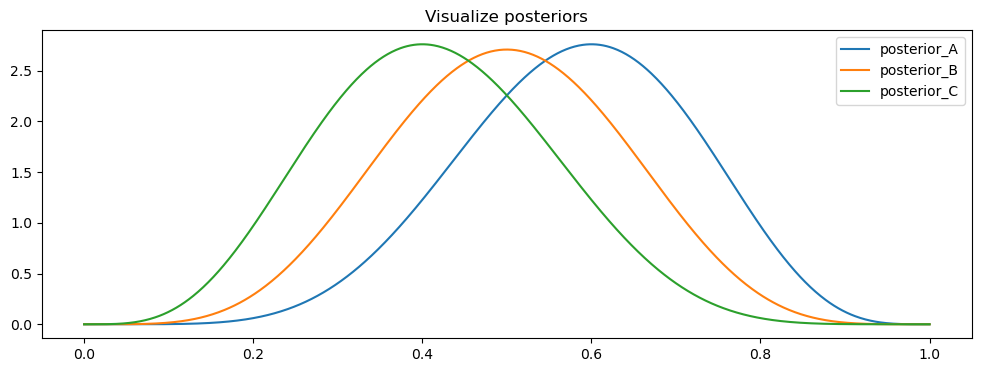

In [15]:
parameter_domain = np.linspace(0,1,1001)
posterior_A = stats.beta(a=x_A + alpha_A,b=n_A - x_A + beta_A).pdf(parameter_domain)
posterior_B = stats.beta(a=x_B + alpha_B,b=n_B - x_B + beta_B).pdf(parameter_domain)
posterior_C = stats.beta(a=x_C + alpha_C,b=n_C - x_C + beta_C).pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, posterior_A, label="posterior_A")
plt.plot(parameter_domain, posterior_B, label="posterior_B")
plt.plot(parameter_domain, posterior_C, label="posterior_C")
plt.legend()
plt.title("Visualize posteriors")

In [16]:
# What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet?
# you can estimate the relative belief of each option. the best choice of three option has highest frequency of highest sample value. 
# If you know the chances that A, B, and C are the best choice, how could you balance exploration versus exploitation when choosing which of the possible options to collect the next data point on next?
# use Epsilon-Greedy method. You can select the red option most of the time, and select blue and other option occasionally to see if their performance be better than currently estimated.